In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report

In [6]:
# generate ring with inner box
N = 1000

seed = 42

random.seed(seed)

circleInner = np.c_[0.1*np.random.randn(N,1), 0.19*np.random.randn(N,1)]
y_circleInner = np.zeros((N,),dtype=np.int)

X, y = make_circles(n_samples=2*N, noise=0.029, shuffle=False)
y += 1

X = np.r_[circleInner, X]
y = np.r_[y_circleInner, y]

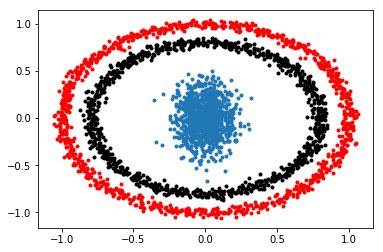

In [7]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

plt.plot(X[idx0,0], X[idx0,1], '.')
plt.plot(X[idx1,0], X[idx1,1], '.r')
plt.plot(X[idx2,0], X[idx2,1], '.k')
plt.show()

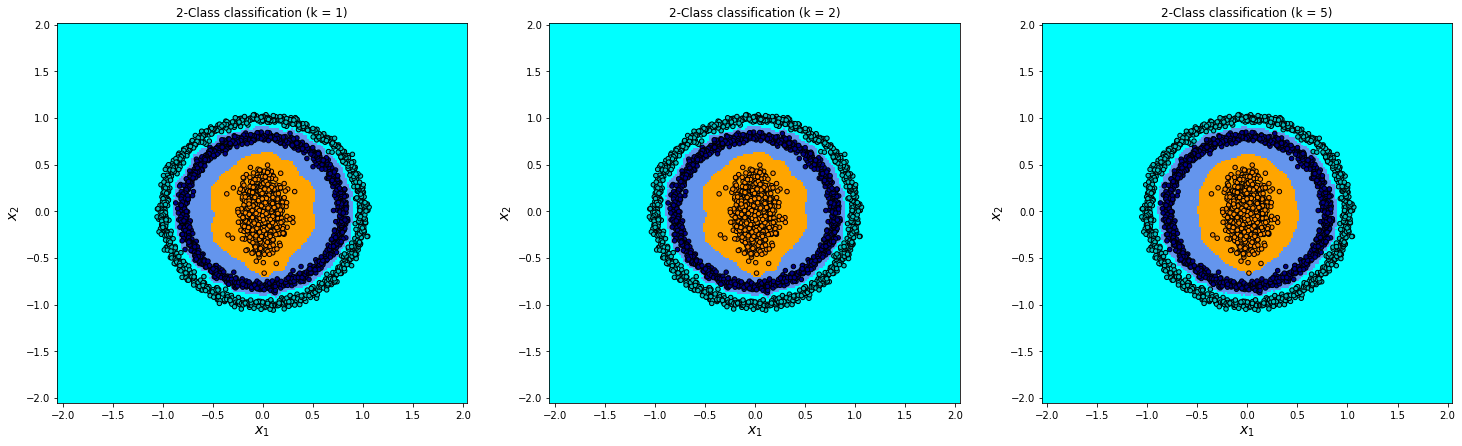

In [16]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

neighbours = [1, 2, 5]

inc = 0
plt.figure(figsize=(25, 7))
for k in neighbours:
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='distance')
    # Train the classifier.
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    ax = plt.subplot(1, len(neighbours), inc + 1)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points.
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$x_2$', fontsize=14)
    plt.title("2-Class classification (k = %i)" % (k))
    inc = inc + 1

plt.show()

In [17]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=23)

acc_train = []
acc_test = []
score_max = 0
k_max = 0
Kmax = 200
for k in range(1,Kmax+1):
    # Create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(k, weights='distance')
    # Train the classifier.
    clf.fit(x_train, y_train)
    # Predict.
    y_pred = clf.predict(x_test)
    # calculate score.
    score_test = clf.score(x_test, y_test)
    acc_test.append(score_test)
    score_train = clf.score(x_train, y_train)
    acc_train.append(score_train)    
    if(score_test > score_max):
        score_max = score_test
        k_max = k

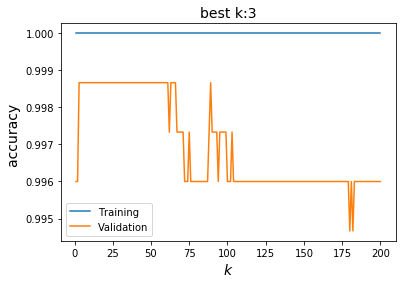

In [18]:
plt.plot(range(1,Kmax+1), acc_train, label='Training')
plt.plot(range(1,Kmax+1), acc_test, label='Validation')
plt.xlabel('$k$', fontsize=14)
plt.ylabel('accuracy ', fontsize=14)
plt.title('best k:'+str(k_max), fontsize=14)
plt.legend()
plt.show()

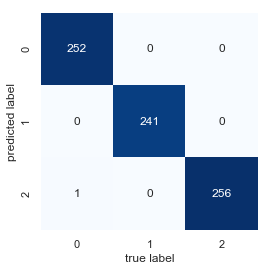

In [20]:
# Create an instance of Neighbours Classifier and fit the data with best k.
clf = KNeighborsClassifier(k_max, weights='distance')
# Train the classifier.
clf.fit(x_train, y_train)
# Predict.
y_pred = clf.predict(x_test)

# Plot the confusion matrix.
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix.png', dpi=600)
plt.show()

In [21]:
print('Accuracy of Logistic Regression model is:', accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 99.86666666666667


In [23]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       256

   micro avg       1.00      1.00      1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

